In [20]:
##Importing the ncessary libraries
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
#Importing the Tesla data
#df = pdr.get_data_yahoo(symbols='TSLA', start=datetime(2010, 6, 29), end=datetime(2023, 9, 17))
df = yf.download('TSLA', start = '2010-06-29', end='2023-09-17')

[*********************100%***********************]  1 of 1 completed


In [22]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-09-11,264.269989,274.850006,260.609985,273.579987,273.579987,174667900
2023-09-12,270.760010,278.390015,266.600006,267.480011,267.480011,135999900
2023-09-13,270.070007,274.980011,268.100006,271.299988,271.299988,111673700


In [24]:
##Checking for any Null Values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
##Saving the downloaded dataset into a csv file
df.to_csv('TSLA.csv')

### Data Visualization

<Axes: xlabel='Date'>

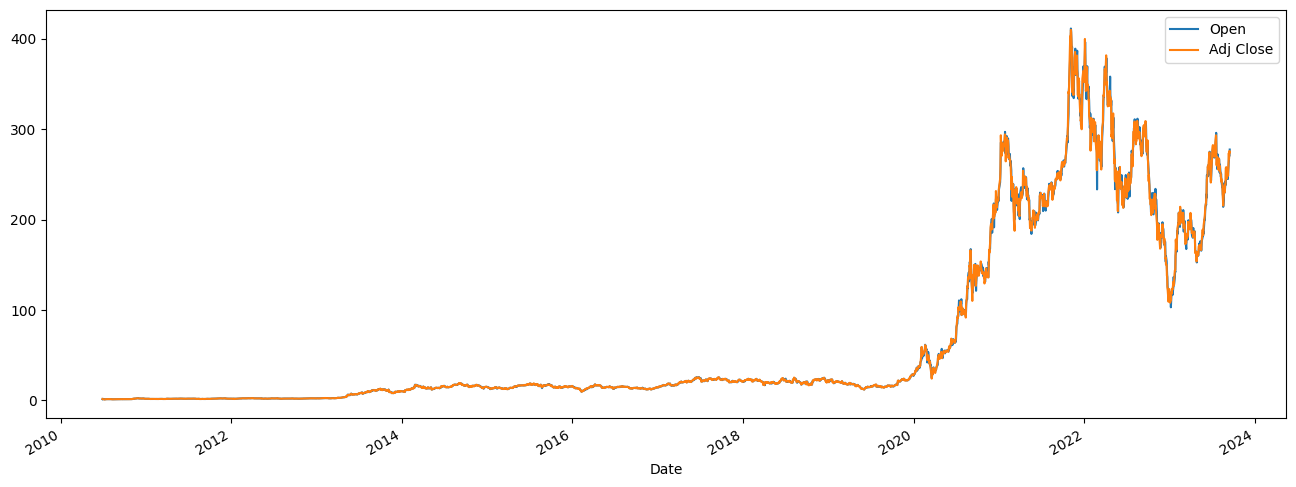

In [26]:
##Will change to an interactive graph
df[['Open', 'Adj Close']].plot(figsize=(16,6))

### Data Preprocessing

In [27]:
# # ##Train-test split
# # from sklearn.model_selection import train_test_split
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

##Splitting based on timeline
split_point = int(len(df) * 0.8)
# Split into training and testing sets
X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

In [28]:
X_train

,Open,High,Low,Volume
Date,,,,
2010-06-29,1.266667,1.666667,1.169333,281494500
2010-06-30,1.719333,2.028000,1.553333,257806500
2010-07-01,1.666667,1.728000,1.351333,123282000
2010-07-02,1.533333,1.540000,1.247333,77097000
2010-07-06,1.333333,1.333333,1.055333,103003500
...,...,...,...,...
2021-01-15,284.000000,286.633331,273.033325,116332800
2021-01-19,279.266663,283.333344,277.666656,76101000
2021-01-20,286.246674,286.500000,279.093323,76997700


### Linear Regression Model

In [29]:
reg = LinearRegression()

model = reg.fit(X_train, y_train)

In [30]:
model.coef_

array([-5.47124600e-01,  9.42640058e-01,  6.00657803e-01, -8.31088642e-10])

In [31]:
model.intercept_

0.04020888747732343

In [32]:
##Prediction and predicted values
y_pred = reg.predict(X_test)
y_pred

array([294.87266407, 293.43207023, 293.28356319, 277.25559229,
       269.46936085, 275.32495489, 291.22063312, 286.75157471,
       280.06075406, 285.58739407, 288.32844628, 282.74523722,
       271.72432833, 273.09885608, 267.90545708, 267.43911115,
       261.77846062, 262.70532308, 261.01143649, 244.5295958 ,
       227.27977576, 243.20013797, 233.4156639 , 226.37654535,
       237.19345023, 232.71740074, 225.14699937, 210.44188847,
       190.93171793, 197.11952249, 221.1925504 , 228.8856781 ,
       228.71620805, 229.47994879, 234.4311707 , 228.47161866,
       231.60906966, 222.26830162, 213.58106378, 228.81626505,
       221.34070113, 214.20692078, 213.00499103, 205.30123434,
       200.73248465, 208.89068834, 221.54380849, 224.00702066,
       230.47082485, 229.36506232, 225.63834529, 227.58656427,
       224.38119543, 232.93824884, 251.98292262, 250.4619687 ,
       242.54549796, 247.63651379, 235.14636752, 243.05967586,
       245.22176645, 245.33054829, 243.63327891, 246.94

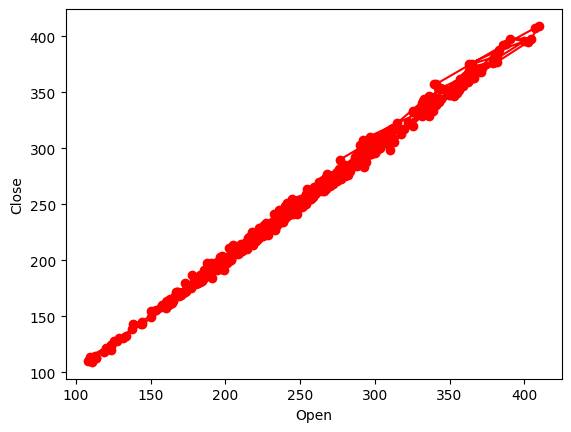

In [33]:
plt.xlabel('Open')
plt.ylabel('Close')
plt.plot(y_test, y_pred, color='red', marker='o')

In [34]:
##model performance
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)

Mean Squared Error :  14.001133680528081
R-Squared : 0.9959175572060945


In [35]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dfr

,Actual,Predicted
Date,,
2021-01-25,293.600006,294.872664
2021-01-26,294.363342,293.432070
2021-01-27,288.053345,293.283563
2021-01-28,278.476654,277.255592
2021-01-29,264.510010,269.469361
...,...,...
2023-09-11,273.579987,270.928479
2023-09-12,267.480011,274.344673
2023-09-13,271.299988,272.428988


In [36]:
dfr.to_csv('Predictions.csv')

In [37]:
dfr = pd.read_csv('Predictions.csv')
dfr

,Date,Actual,Predicted
0,2021-01-25,293.600006,294.872664
1,2021-01-26,294.363342,293.432070
2,2021-01-27,288.053345,293.283563
3,2021-01-28,278.476654,277.255592
4,2021-01-29,264.510010,269.469361
...,...,...,...
661,2023-09-11,273.579987,270.928479
662,2023-09-12,267.480011,274.344673
663,2023-09-13,271.299988,272.428988
664,2023-09-14,276.040009,274.772656


In [38]:
# Create the figure
fig = go.Figure()

# Add the 'Actual' data to the figure
fig.add_trace(go.Scatter(
    x=dfr['Date'],
    y=dfr['Actual'],
    mode='lines+markers',
    name='Actual',
    hovertemplate='<b>Date</b>: %{x}<br><b>Actual Price</b>: %{y:.2f}<extra></extra>',
    line=dict(color='blue'),
    marker=dict(size=5)
))

# Add the 'Predicted' data to the figure
fig.add_trace(go.Scatter(
    x=dfr['Date'],
    y=dfr['Predicted'],
    mode='lines+markers',
    name='Predicted',
    hovertemplate='<b>Date</b>: %{x}<br><b>Predicted Price</b>: %{y:.2f}<extra></extra>',
    line=dict(color='orange'),
    marker=dict(size=5)
))

# Customize the layout of the graph
fig.update_layout(
    title='Actual vs Predicted Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    hovermode='x',  # Ensures the hover shows both Actual and Predicted at the same time
    template='plotly_dark',  # Optional: You can use other themes like 'plotly_white'
    width=1000,
    height=600
)

# Show the interactive plot
fig.show(renderer='browser')
